Import libraries

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#importing library
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os


Data preprocessing

>Training Image preprocessing

In [3]:
# Data preprocessing
def preprocess_data(dataset):
    # Normalize the data
    def process_image(image, label):
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    dataset = dataset.map(process_image)
    return dataset

In [27]:
#keras.utils.image_dataset_from_directory is a class used to load images in the python file using keras which comes under tensorflow
training_set = tf.keras.utils.image_dataset_from_directory('train',
    labels="inferred",  #this means : whatever is the name of the directory , select it as my label
    label_mode="categorical",   #"categorical" means that the labels are encoded as a categorical vector
    class_names=None,   #Only valid if labels is "inferred". This is the explicit list of class names (must match names of subdirectories). Used to control the order of the classes
    color_mode="rgb",   #Whether the images will be converted to have 1, 3, or 4 channels. Defaults to "rgb". others are greyscale,ckms,rgba etc
    batch_size=32,      #Size of the batches of data. Defaults to 32. If None, the data will not be batched (the dataset will yield individual samples).
    image_size=(128, 128),  #Size to resize images to after they are read from disk, specified as (height, width). Defaults to (256, 256).
    shuffle=True,   #Whether to shuffle the data. Defaults to True. If set to False, sorts the data in alphanumeric order or sequence
    seed=42,
    interpolation="bilinear"  #String, the interpolation method used when resizing images. Supports "bilinear", "nearest", "bicubic", "area", "lanczos3", "lanczos5", "gaussian", "mitchellcubic". Defaults to "bilinear".
)

Found 70295 files belonging to 38 classes.


In [28]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred", #this means : whatever is the name of the directory , select it as my label
    label_mode="categorical",   #"categorical" means that the labels are encoded as a categorical vector
    class_names=None,   #Only valid if labels is "inferred". This is the explicit list of class names (must match names of subdirectories). Used to control the order of the classes
    color_mode="rgb",   #Whether the images will be converted to have 1, 3, or 4 channels. Defaults to "rgb". others are greyscale,ckms,rgba etc
    batch_size=32,      #Size of the batches of data. Defaults to 32. If None, the data will not be batched (the dataset will yield individual samples).
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    validation_split = None,
    subset = None,

)

Found 17572 files belonging to 38 classes.


In [29]:
# Preprocess the datasets
#training_set = preprocess_data(training_set)
#validation_set = preprocess_data(validation_set)

In [30]:
training_set #here 3 in shape represents the RGB image and 128x128 is img size
#here TensorSpec(shape=(None, 128,128,3)....) is x variable and TensorSpec(shape=(None,38),....) is Y variable

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [31]:
validation_set #here 3 in shape represents the RGB image and 128x128 is img size
#here TensorSpec(shape=(None, 128,128,3)....) is x variable and TensorSpec(shape=(None,38),....) is Y variable

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [32]:
#importing few more libraries
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential

In [33]:
cnn = tf.keras.models.Sequential() #sequential format data (model) training

In [34]:
#layer 1
cnn.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3])) #this line show how input will be taken
#kernel size = shows the data or feature extraction will done on which type of matrix (if 3 then it will be 3x3 matrix).
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu')) #layer 2 (does not need any i/p size hence we remove it rest is same)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))       #layer 3 : max pooling layer
#max pooling : each pooling operation selects the maximum value of the current view. where strides shows the moment of sliding window (if its is 2 then it means it is 2x2 matrix form)

In [35]:
cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [39]:
cnn.add(tf.keras.layers.Dropout(0.25))#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting
#this also helps to prevent have more noises from the images

In [40]:
cnn.add(tf.keras.layers.Flatten())
#Flattens the input. Does not affect the batch size.
#If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

In [41]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))# =>hidden layer
#densely-connected NN layer.
#Dense implements the operation: output = activation(dot(input, kernel) + bias)
#where activation is the element-wise activation function passed as the activation argument,
#kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

In [42]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [43]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax')) #here we use softmax bcoz we need output in probability form

In [44]:
# Compile the model
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
# Display model summary
cnn.summary()

# Define callbacks
#callbacks = [
 #   tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
  #  tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3),
   # tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
#]

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Train the model
epochs = 15
history = cnn.fit(
    training_set,
    validation_data=validation_set,
    epochs=epochs
)

Epoch 1/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3092s 1s/step - accuracy: 0.3929 - loss: 2.1621 - val_accuracy: 0.8240 - val_loss: 0.5541
Epoch 2/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2810s 1s/step - accuracy: 0.8359 - loss: 0.5255 - val_accuracy: 0.8982 - val_loss: 0.3180
Epoch 3/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2428s 1s/step - accuracy: 0.9000 - loss: 0.3122 - val_accuracy: 0.9396 - val_loss: 0.1871
Epoch 4/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2732s 1s/step - accuracy: 0.9353 - loss: 0.1970 - val_accuracy: 0.9358 - val_loss: 0.2043
Epoch 5/15
 696/2197 ━━━━━━━━━━━━━━━━━━━━ 30:34 1s/step - accuracy: 0.9427 - loss: 0.1741

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the training set
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1010s 459ms/step - accuracy: 0.0284 - loss: 3.6360
Training accuracy: 0.02876449190080166


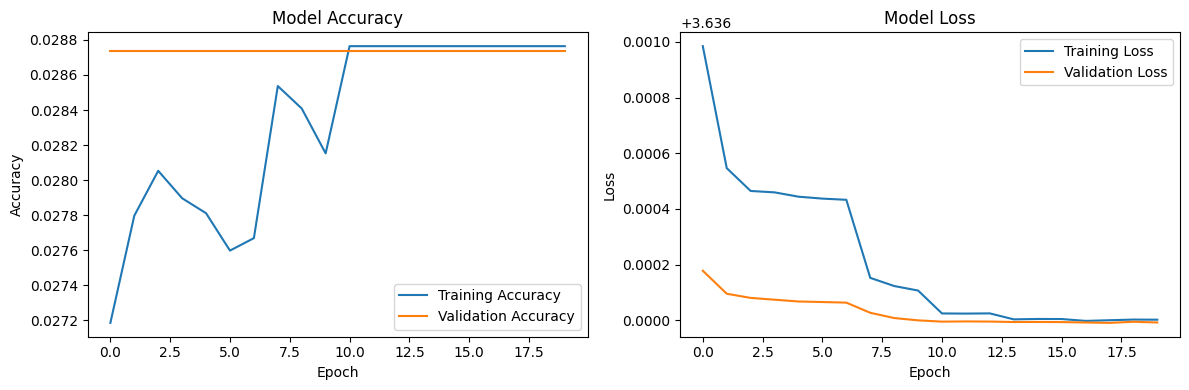

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save the model
cnn.save('plant_disease_model.keras')
print("Model saved successfully.")

Model saved successfully.


# How images were selected from the folders

In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[0.61960787 0.5411765  0.5372549 ]
   [0.6343137  0.55588233 0.55196077]
   [0.6343137  0.55588233 0.55196077]
   ...
   [0.7823529  0.7117647  0.7117647 ]
   [0.7676471  0.6970588  0.6970588 ]
   [0.7147059  0.64411765 0.64411765]]

  [[0.65294117 0.5745098  0.57058823]
   [0.58431375 0.5058824  0.5019608 ]
   [0.6068627  0.52843136 0.5245098 ]
   ...
   [0.70490193 0.6343137  0.6343137 ]
   [0.69509804 0.6245098  0.6245098 ]
   [0.75490195 0.6843137  0.6843137 ]]

  [[0.6107843  0.5323529  0.52843136]
   [0.60294116 0.5245098  0.5205882 ]
   [0.6343137  0.55588233 0.55196077]
   ...
   [0.7107843  0.6401961  0.6401961 ]
   [0.7558824  0.6852941  0.6852941 ]
   [0.7362745  0.66568625 0.66568625]]

  ...

  [[0.41764706 0.3627451  0.31960785]
   [0.39411765 0.3392157  0.29607844]
   [0.39607844 0.34117648 0.29803923]
   ...
   [0.4862745  0.45784312 0.35980392]
   [0.4970588  0.42941177 0.37745097]
   [0.5147059  0.41862744 0.38921568]]

  [[0.40294117 0.35588235 0.308823

# :- in batch format

for training set

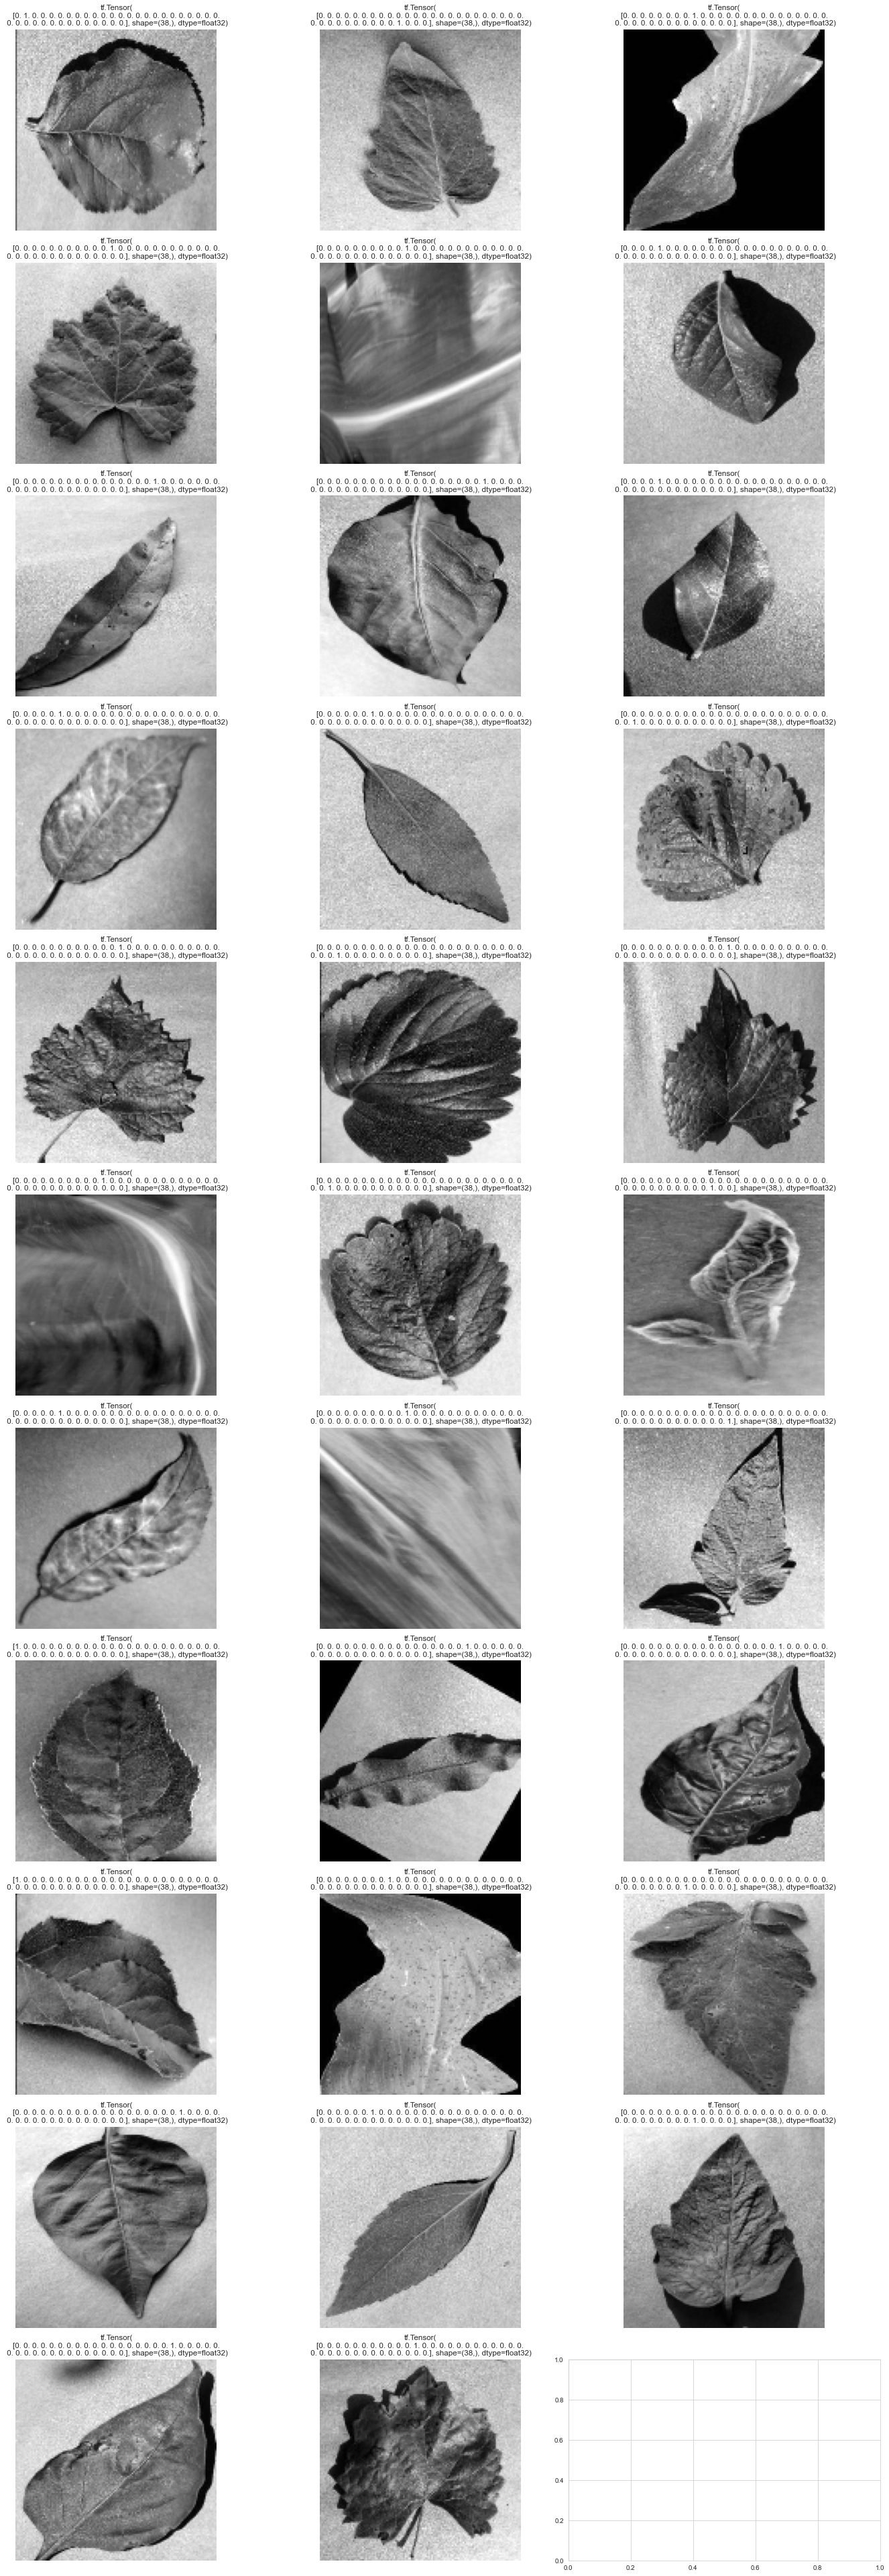

In [ ]:
# Plot the images in the training set
for x, y in training_set.take(1):  # Take the first batch
    rows = (x.shape[0] + 2) // 3  # Calculate the number of rows needed
    fig, axs = plt.subplots(rows, 3, figsize=(20, rows * 5), dpi=70)  # Increased figure width
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Added padding between subplots
    for i in range(x.shape[0]):
        img = x[i]
        label = y[i]
        axs[i // 3, i % 3].imshow(np.mean(img, axis=2), cmap='gray')
        axs[i // 3, i % 3].set_title(label)
        axs[i // 3, i % 3].axis('off')
    plt.tight_layout()
    plt.show()

for validation set

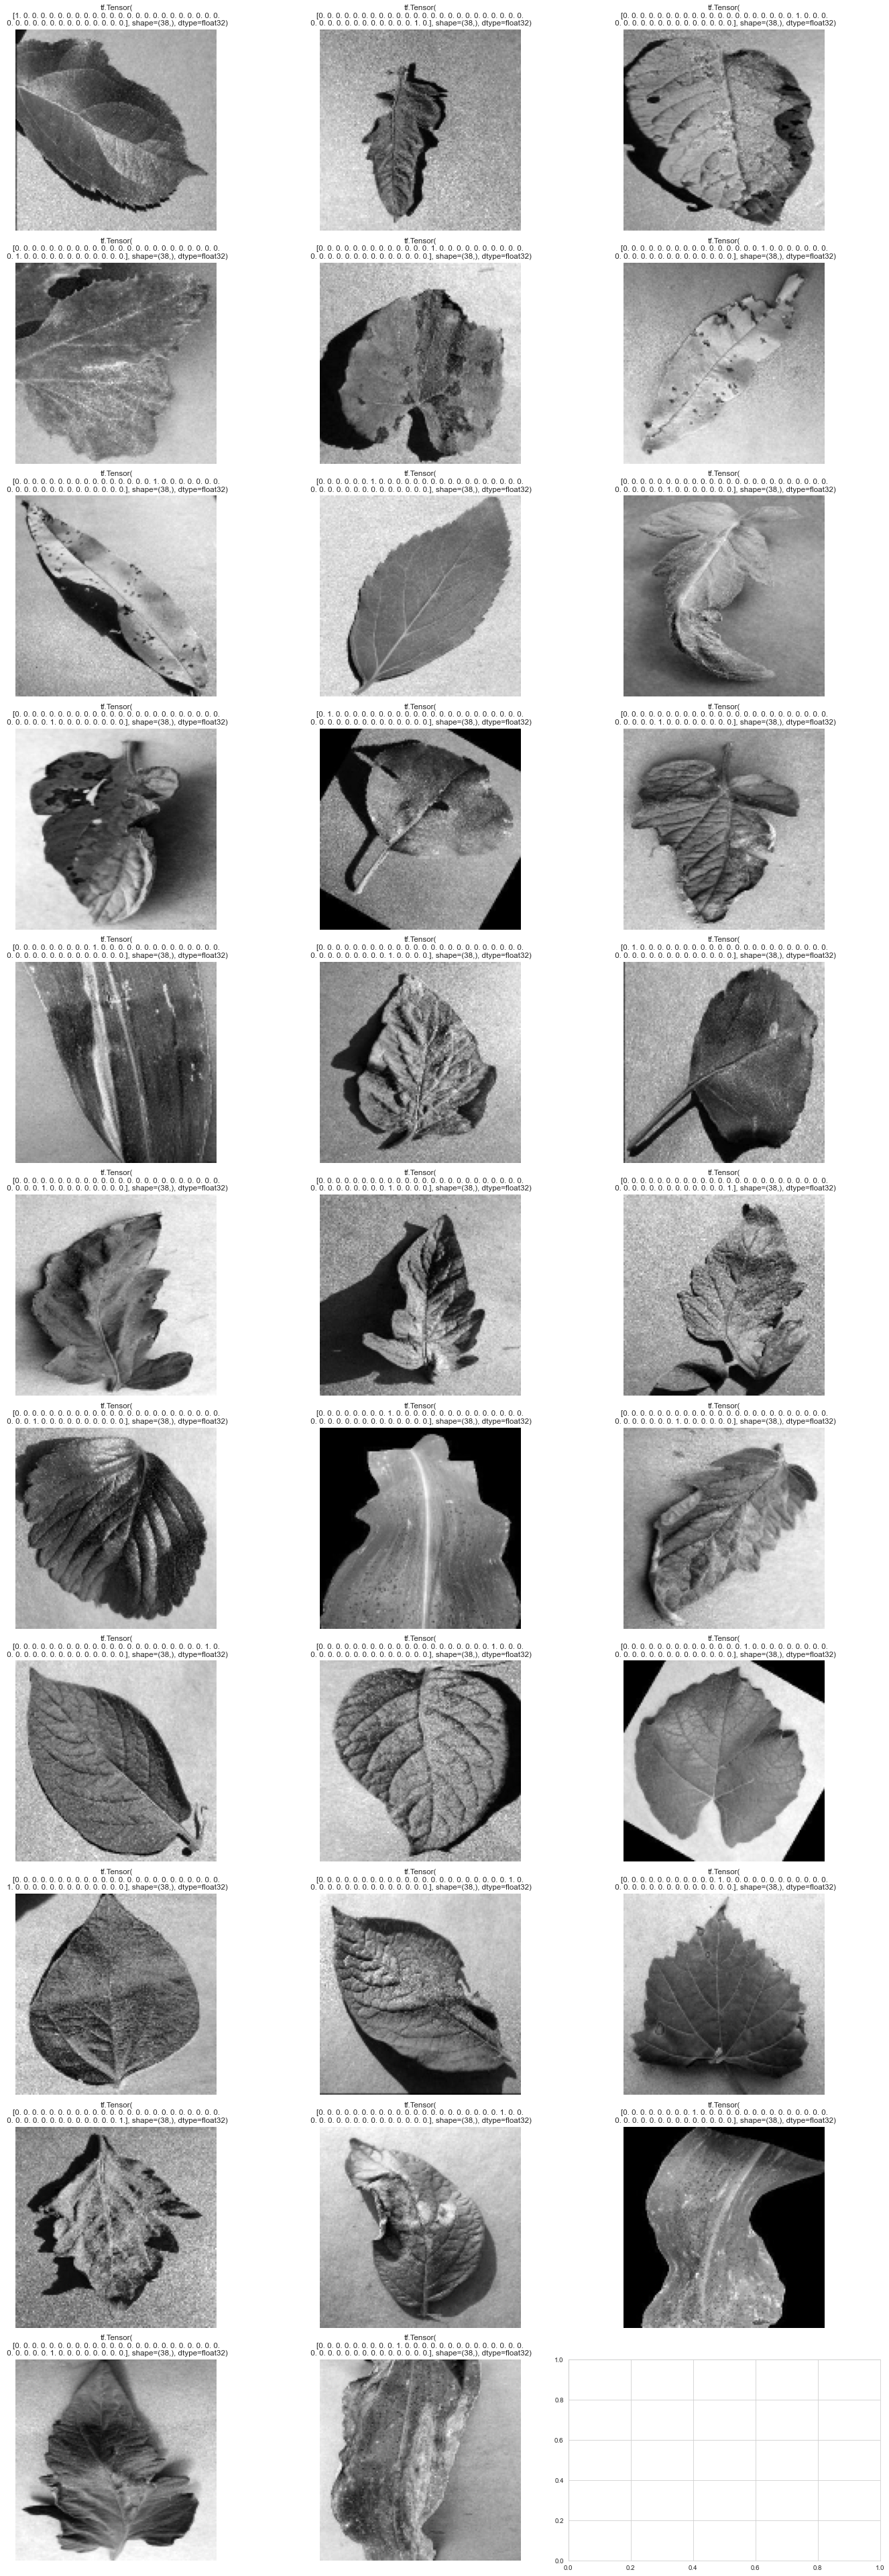

In [ ]:
# Plot the images in the training set
for x, y in validation_set.take(1):  # Take the first batch
    rows = (x.shape[0] + 2) // 3  # Calculate the number of rows needed
    fig, axs = plt.subplots(rows, 3, figsize=(20, rows * 5), dpi=70)  # Increased figure width
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Added padding between subplots
    for i in range(x.shape[0]):
        img = x[i]
        label = y[i]
        axs[i // 3, i % 3].imshow(np.mean(img, axis=2), cmap='gray')
        axs[i // 3, i % 3].set_title(label)
        axs[i // 3, i % 3].axis('off')
    plt.tight_layout()
    plt.show()

Found 70295 files.


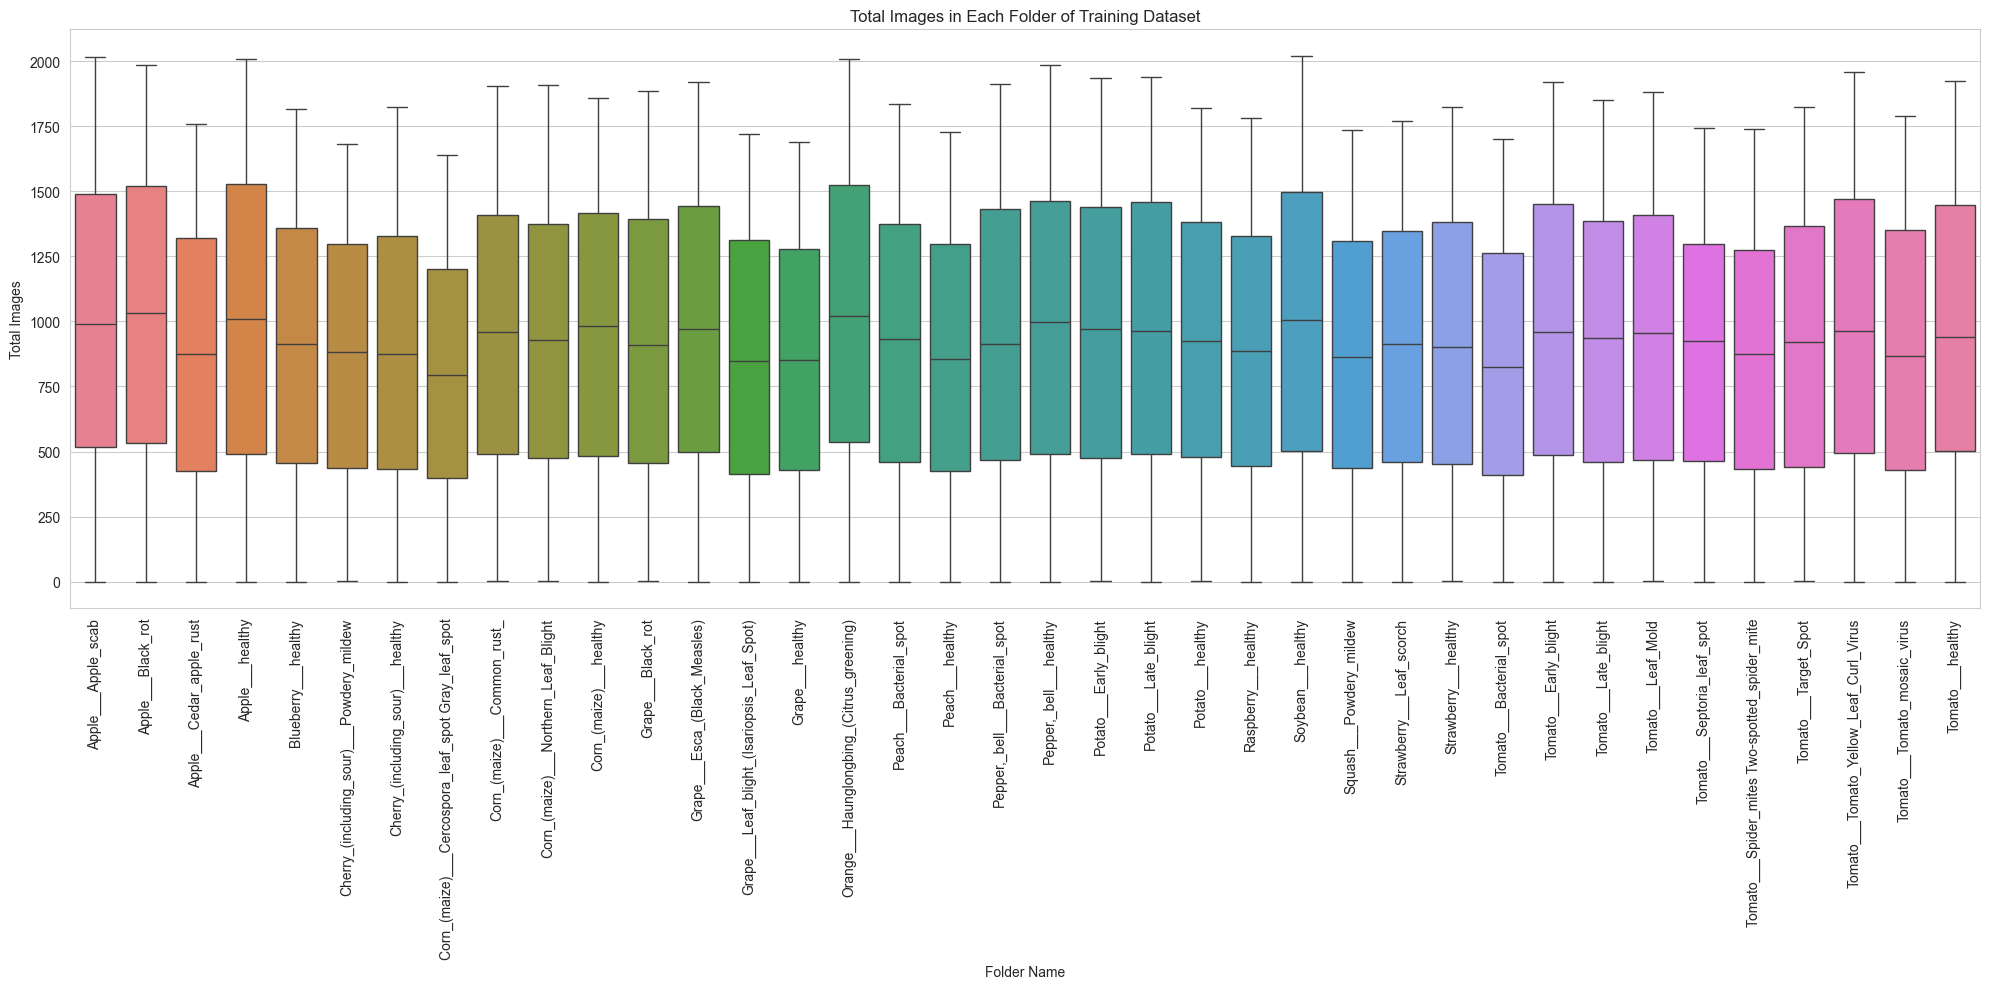

In [ ]:
# Load dataset from directory
dataset_path = "C:/Users/ALOK/Desktop/VT/ML/Plant_disease_detection/train"  # Replace with the path to your dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    label_mode=None,  # Avoid loading labels, focus only on images
    shuffle=False
)
# Get folder names and counts
folder_names = []
folder_image_counts = []
# Walk through directory to count images in each folder
for folder in sorted(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        folder_names.append(folder)  # Add folder name
        folder_image_counts.append(len(os.listdir(folder_path)))  # Count images
# Create dictionary with folder names and random image data
images_dict = {
    folder: np.random.randint(0, count, size=count) for folder, count in zip(folder_names, folder_image_counts)
}
# Plot the box plot
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
sns.boxplot(data=list(images_dict.values()))  # Convert dictionary values to a list
plt.xticks(ticks=range(len(folder_names)), labels=folder_names, rotation=90)  # Folder names on x-axis
plt.xlabel('Folder Name')
plt.ylabel('Total Images')
plt.title('Total Images in Each Folder of Training Dataset')
plt.tight_layout()
plt.show()


In [ ]:
#To avoid Overshooting Loss function
#Choose small learning rate default 0.001 here we have taken 0.0001
#There may be chance of underfitting so increase number of neuron
#Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [ ]:
#importing more libraries
from sklearn.metrics import confusion_matrix

In [ ]:
# Function to get predictions and true labels
def get_predictions_and_labels(dataset, model):
    all_predictions = []
    all_labels = []
    for images, labels in dataset:
        predictions = model.predict(images)
        all_predictions.extend(np.argmax(predictions, axis=1))
        all_labels.extend(np.argmax(labels, axis=1))
    return np.array(all_predictions), np.array(all_labels)

In [ ]:
# Get predictions and true labels
y_pred, y_true = get_predictions_and_labels(validation_set, cnn)

# Get class names
class_names = validation_set.class_names

test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

In [ ]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate and plot accuracy for each class
class_accuracy = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(20, 10))
sns.barplot(x=class_names, y=class_accuracy)
plt.title('Accuracy for Each Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Print overall accuracy
overall_accuracy = np.sum(cm.diagonal()) / np.sum(cm)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

# Print accuracy for each class
for name, accuracy in zip(class_names, class_accuracy):
    print(f"{name}: {accuracy:.4f}")